# Heart Disease Dataset

In this project, we will be analysing a Heart Disease dataset from 1988, consisting of data from Cleveland, Hungary, Switzerland and Long Beach. In hopes of understanding the dataset and making predictions of presence of heart disease in a person, we will try to tackle a supervised and an unsupervised task. 

In supervised learning, we aim to run classification using 3 different models: logistic regression, supported vector machine(SVM), and decision tree, where model will be selected using cross-validation.  

While in unsupervised learning, we aim to do dimensionality reduction by using PCA and t-SNE, in hopes of exploring underlying relationships among variables and the major contributing variables. Though it is clear that even we do two models with the same aim, it might not necessarily give us the same result, nor a similar set of materials to interpret. Besides, in contrast to supervised learning, unsuperbvised learning does not have ground truth labels to evaluate against. Hence, a more thorough and non-numerical evluation will be carried out. 

In [41]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
file_path = '/Users/veritaschen/Desktop/NUS/DSA5102/Final/heart.csv'
data = pd.read_csv(file_path)

In [169]:
data.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

## Introduction to dataset

The dataset has 76 attributes, we will only be using a subset of 14 of them, referring to all published experiments, including features: age; sex; chest pain type(cp); resting blood pressure(trestbps); serum cholesterol(chol); fasting blood sugar(fbs); resting electrocardiographic results(restecg); maximum heart rate achieved(thalach); exercise induced angina(exang); ST depression induced by exercise relative to rest(oldpeak); the slope of the peak exercise ST segment(slope); number of major vessels colored by flourosopy(ca); the reversibility of defect(thal), and the target being distinguish presence of heart disease(num). Here we have 1025 instances to evalute.  

In [58]:
x, y = data[data.columns[:-1]], data[data.columns[-1]]

## Visualisation

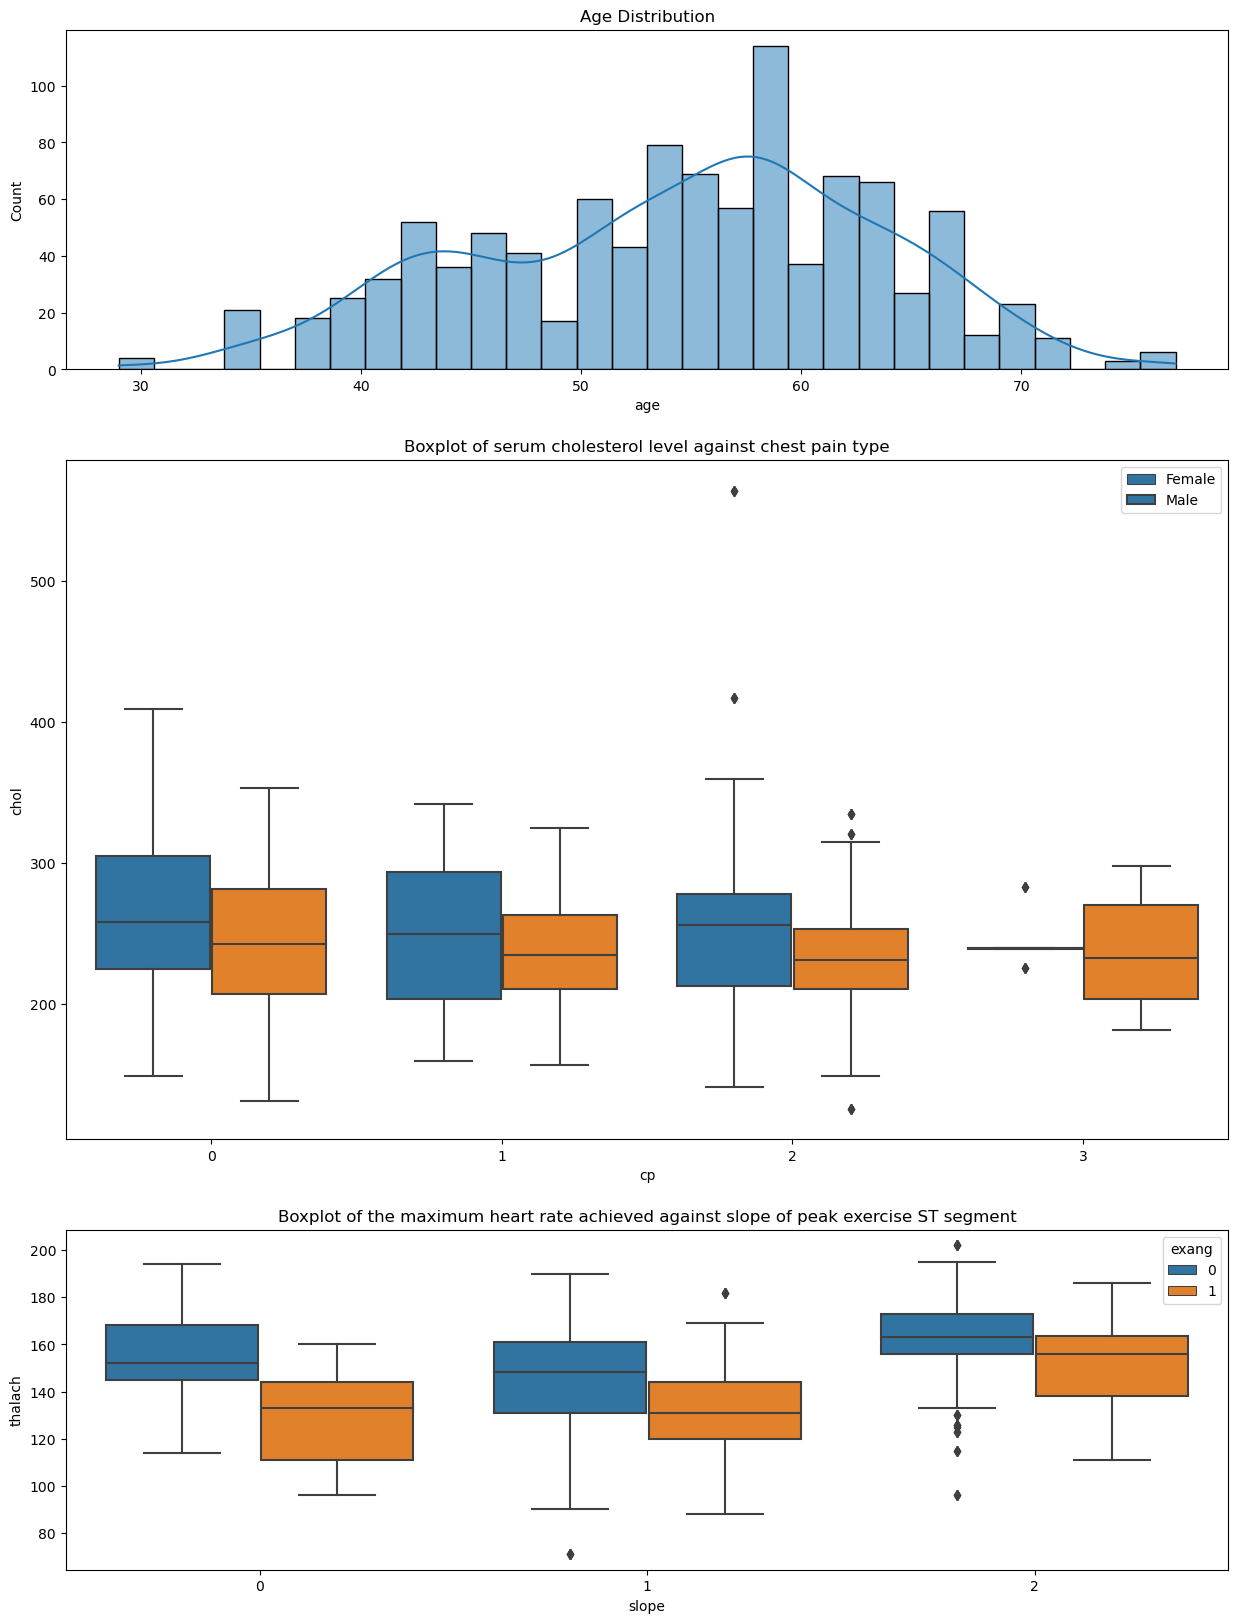

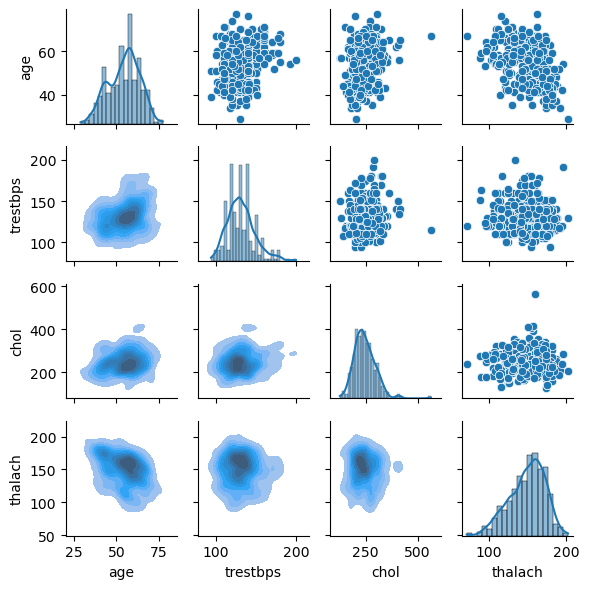

In [182]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 20), gridspec_kw={'height_ratios': [1, 2, 1]})

# Histogram for age
sns.histplot(data['age'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Age Distribution')

# Boxplot for serum cholesterol against chest pain type
sns.boxplot(x='cp', y='chol', data=data, hue='sex', ax=axs[1])
axs[1].set_title('Boxplot of serum cholesterol level against chest pain type')
axs[1].legend(['Female', 'Male'])


# Boxplot for maximum heart rate achieved against slope of the peak exercise ST segment
sns.boxplot(x='slope', y='thalach', data=data, hue = 'exang', ax=axs[2])
axs[2].set_title('Boxplot of the maximum heart rate achieved against slope of peak exercise ST segment')

# PairGrid for age, the resting blood pressure, serum cholestoral, the maximum heart rate achieved
selected_features = ['age', 'trestbps', 'chol', 'thalach']
g = sns.PairGrid(data[selected_features], height=1.5)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

plt.tight_layout()
plt.show()

In the section above, we visualised the age distribution; serum cholesterol against chest pain type of both male and female; maximum heart rate achieved against slope of the peak exercise ST segment; as well as pairgrid for 4 features: age, the resting blood pressure, serum cholestoral, the maximum heart rate achieved. The following observations were concluded: 
1) Amongst the recorded age groups, most patients aged between 50 and 60, with only a few aged below 40 and above 70, indicating the likelihood of cardiological problems arising as the age increases.
2) For the same distinguish presence index, the mean level of serum cholesterol of female is generally higher than male's. 
3) For the same sloping trend, those who experience exercise induced angina generally have lower average maximum heart rate achieved than those who do not. 
4) There seems to be a slight positive correlation between age and the resting blood pressure, suggesting that as age increases, resting blood pressure might also increase. age vs. chol: There is no strong relationship between age and level of cholesterol, but there's a slight trend suggesting that older individuals might have higher cholesterol. A negative correlation between age and the maximum heart rate achieved is visible--As age increases, the maximum heart rate achieved decreases. trestbps vs. chol: There is no strong linear relationship between the resting blood pressure and cholesterol level. Also no evidence suggests a strong relationship between the resting blood pressure and the maximum heart rate achieved, or the level of serum cholesterol and the maximum heart rate achieved.

From the plots obtained, there are some interesting findings that seem counterintuitive, e.g., how females generally tend to have higher serum cholesterol level; for those who experience exercise induced angina, they have lower average maximum heart rate achieved than those who do not, which leads us to analyse further.  

For the serum cholesterol finding, we plot the following: 

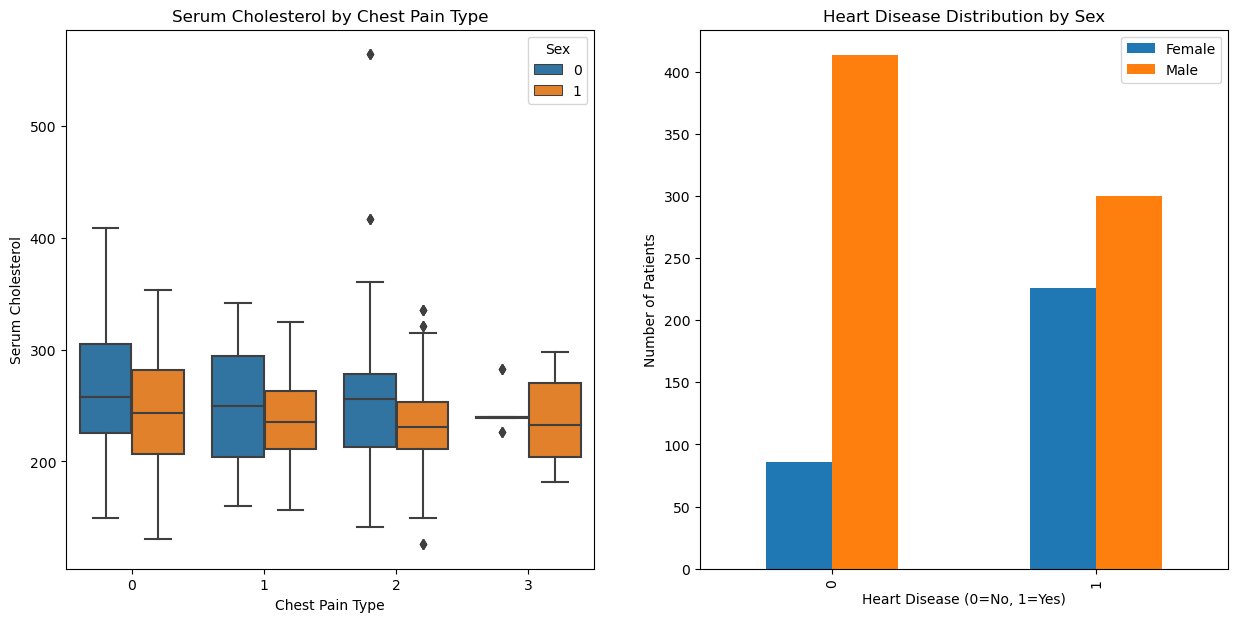

In [236]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # 1 row, 2 columns

# Serum cholesterol against chest pain type with hue 'sex'
sns.boxplot(x='cp', y='chol', hue='sex', data=data, ax=axs[0])
axs[0].set_title('Serum Cholesterol by Chest Pain Type')
axs[0].set_xlabel('Chest Pain Type')
axs[0].set_ylabel('Serum Cholesterol')
axs[0].legend(title='Sex')

# Count of target by sex
pd.crosstab(data.target, data.sex).plot(kind='bar', ax=axs[1])
axs[1].set_title('Heart Disease Distribution by Sex')
axs[1].set_xlabel('Heart Disease (0=No, 1=Yes)')
axs[1].set_ylabel('Number of Patients')
axs[1].legend(['Female', 'Male'])

We see that, we have more males recorded than females. However, based on the ratios of females/males having and not having heart disease and the higher average of serum cholesterol level in females, we deduce that high serum cholesterol might be a major contributing factor to the diagnosis of heart disease.

For the observation in correlation between exercise induced angina and maximum heart rate achieved, there are several medical factors to account for: 
1) The age-predicted maximum one could achieve(i.e., 220bpm-age); 
2) Different heart conditions: heart block, heart failure, etc. 
3) Use of medications: beta-block.

and more.

# Supervised Learning
For supervised learning task, we would like to do classification, to predict whether a recorded patient has heart disease based on the other features. Here the predicted attribute is a binary variable indicating two angiographic disease status: with 0 being <50% diameter narrowing, 1 being >50% diameter narrowing. 

In [108]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Data-Preprocessing
**Missing Values**:
First, we deal with the missing values, check the existence by the following code. 

In [187]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Now we see that no column has missing values, then we proceed by checking the statistics of the dataset, by looking at attributes' mean, standard deviation, minimum, quartiles, and maximum, which might be helpful for outliers analysis

In [63]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Splitting train and test data:**
Here we split the datasets into train, test set.

In [188]:
x, y = data[data.columns[:-1]], data[data.columns[-1]]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)  

**Feature Scaling**

In [189]:
standard_scaler = StandardScaler()

# Fit and transform the features
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.transform(x_test)

**3 Models:**
Here we use 3 different models to assist us: Logistic regression, SVM, and decision tree. 

In [190]:
# Logistic Regression
lr = LogisticRegression()
lr_cv_score = cross_val_score(lr, x_train_scaled, y_train, cv=5)
lr.fit(x_train_scaled, y_train)
lr_acc = accuracy_score(y_test, lr.predict(x_test_scaled))

# Support Vector Machine
svm = SVC(kernel='linear') 
svm_cv_score = cross_val_score(svm, x_train_scaled, y_train, cv=5)
svm.fit(x_train_scaled, y_train)
svm_acc = accuracy_score(y_test, svm.predict(x_test_scaled))

# Decision Tree
dt = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt, x_train_scaled, y_train, cv=5)
dt.fit(x_train_scaled, y_train)
dt_acc = accuracy_score(y_test, dt.predict(x_test_scaled))



# Compare performances
print(f"Logistic Regression Test Accuracy: {lr_acc}")
print(f"SVM Test Accuracy: {svm_acc}")
print(f"Decision Tree Test Accuracy: {dt_acc}")


print(f"Logistic Regression CV Accuracy: {lr_cv_score.mean()}")
print(f"SVM CV Accuracy: {svm_cv_score.mean()}")
print(f"Decision Tree CV Accuracy: {dt_cv_score.mean()}")

Logistic Regression Test Accuracy: 0.7951219512195122
SVM Test Accuracy: 0.8146341463414634
Decision Tree Test Accuracy: 0.9853658536585366
Logistic Regression CV Accuracy: 0.8487804878048781
SVM CV Accuracy: 0.8426829268292682
Decision Tree CV Accuracy: 0.978048780487805


From the statistics obtained above, we can see that decision tree has the highest cross-value accuracy, and is likely to be used for future prediction on similar datasets. Though evaluation and comparison should still be carried out accordingly. 

# Unsupervised Learning

In this section, we will aim to reduce dimensionality of the dataset where two models--PCA and t-SNE will be implemented.

**PCA** is a procedure which creates new uncorrelated varaibles that succesively maximise variance by converting the original variables using orthogonal transformation. It emphasises the variation as brings out strong patterns in a dataset. 

**t-SNE** is a non-linear procedure that converts distance between data points into conditional probabilities computed from a student-t distribution that represent similarities. 

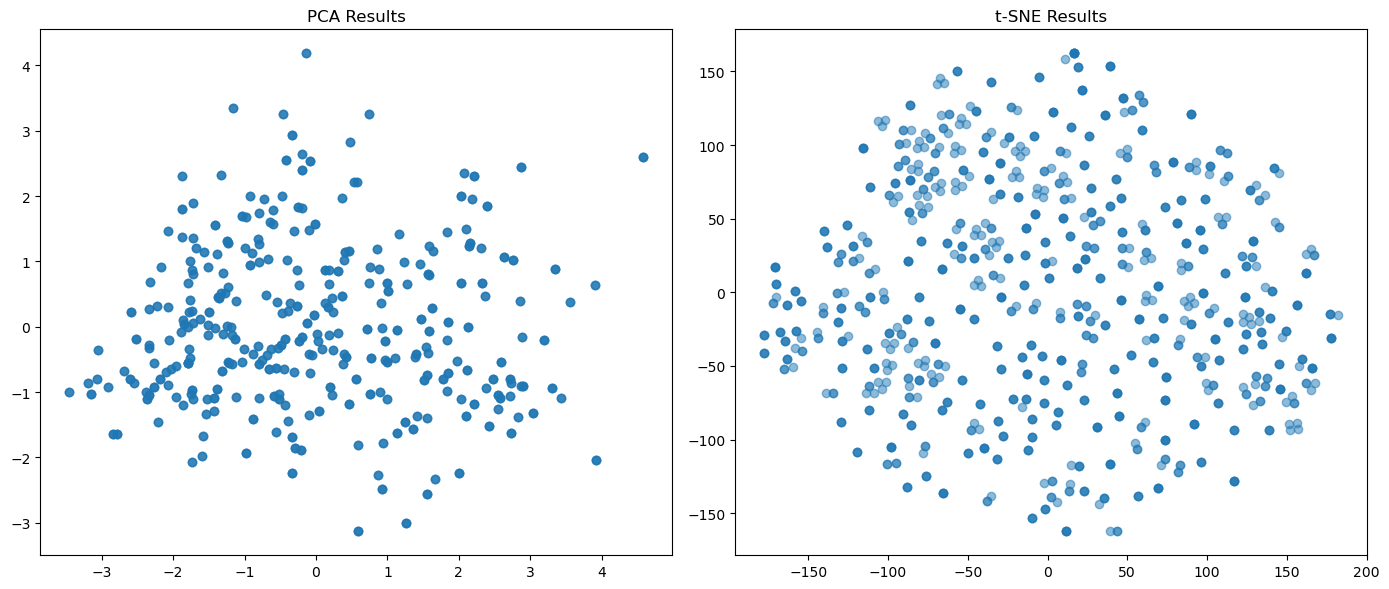

In [223]:
# For unsupervised learning, we first remove the 'label', i.e., the y('target') in the dataset
X_unsupervised = data.drop('target', axis=1)

# Standardising features
scaler_unsupervised = StandardScaler()
X_scaled = scaler_unsupervised.fit_transform(X_unsupervised)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)


plt.figure(figsize=(14, 6))

# PCA result visualisation
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Results')

# t-SNE result visualisation
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE Results')

plt.tight_layout()
plt.show()

**PCA Results:** No signs of distict clusters, which indicates that the variance in the data isn't strongly aligned with the axes found by PCA, and that PCA might not have captured the underlying underlying structure of the data.


**t-SNE Results:** Data are more spread out, revealing more local structure of the data. Yet there is no clear separation between the potential clusters, which may require further tuning on parameters. 


PCA retains global structure, while t-SNE reveals more local neighbourhood structure based on the mathematics behind each method. Although both methods somewhat successfully reduced the dimension of the dataset, there is still a lack of clear clusters in both plots, which suggests that the dataset's underlying structure might be more complex than expected, or more meaningful clusters might exist in some higher dimension. 


Since we cannot interpret much from the t-SNE as it requires knowledge about the function that maps each point on the graph to the original datapoint, which we cannot obtain, we will then further analyse the principal components to our data, to uncover the variables that are strongly correlated with the first few principal components, and understand the variations captured in the data. 

## PCA

In [226]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)

PCA()

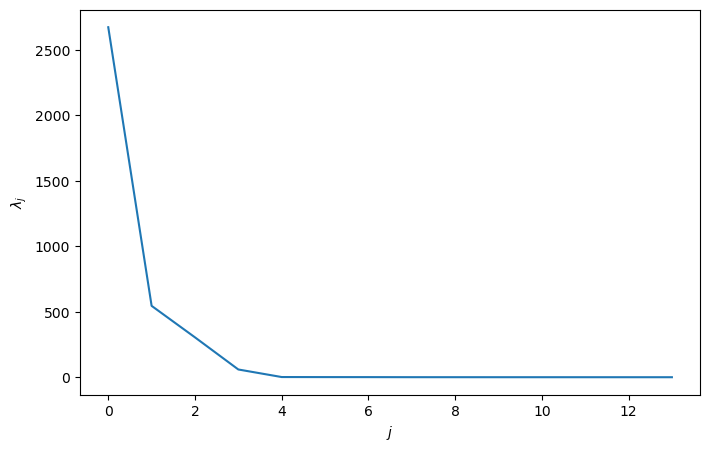

In [227]:
# Plot the explained variance indicating the explanability of the features
plt.plot(pca.explained_variance_)
plt.xlabel(r'$j$')
plt.ylabel(r'$\lambda_j$');

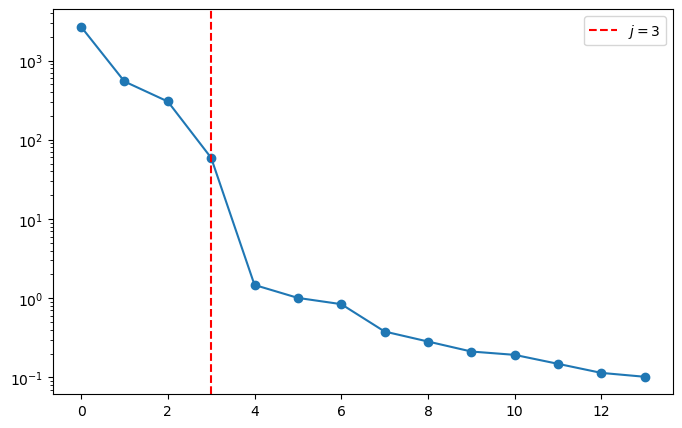

In [228]:
plt.semilogy(pca.explained_variance_, '-o')
plt.axvline(x=3, c='r', ls='--', label=r'$j=3$')
plt.legend()

The eigenvalues (explained variance) drops drastically after the 3<sup>rd</sup> component. Moreover, the first component *drastically* dominates the rest. In fact, we can plot a normalized view below:

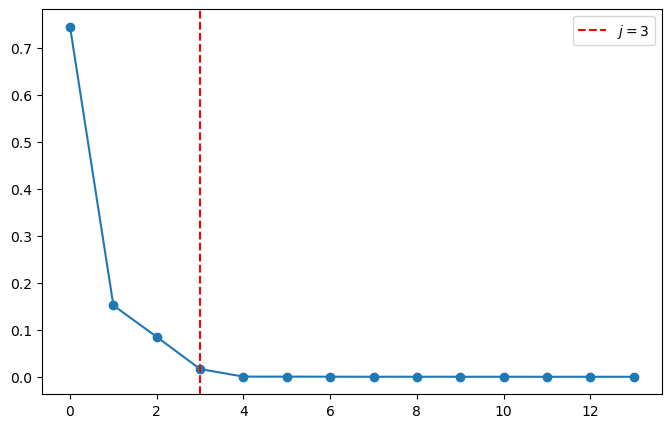

In [230]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.axvline(x=3, c='r', ls='--', label=r'$j=3$')
plt.legend()

## Principal Components

Now we check the principal components we have obtained.

Text(0.5, 1.0, 'Second Principal Component Axis')

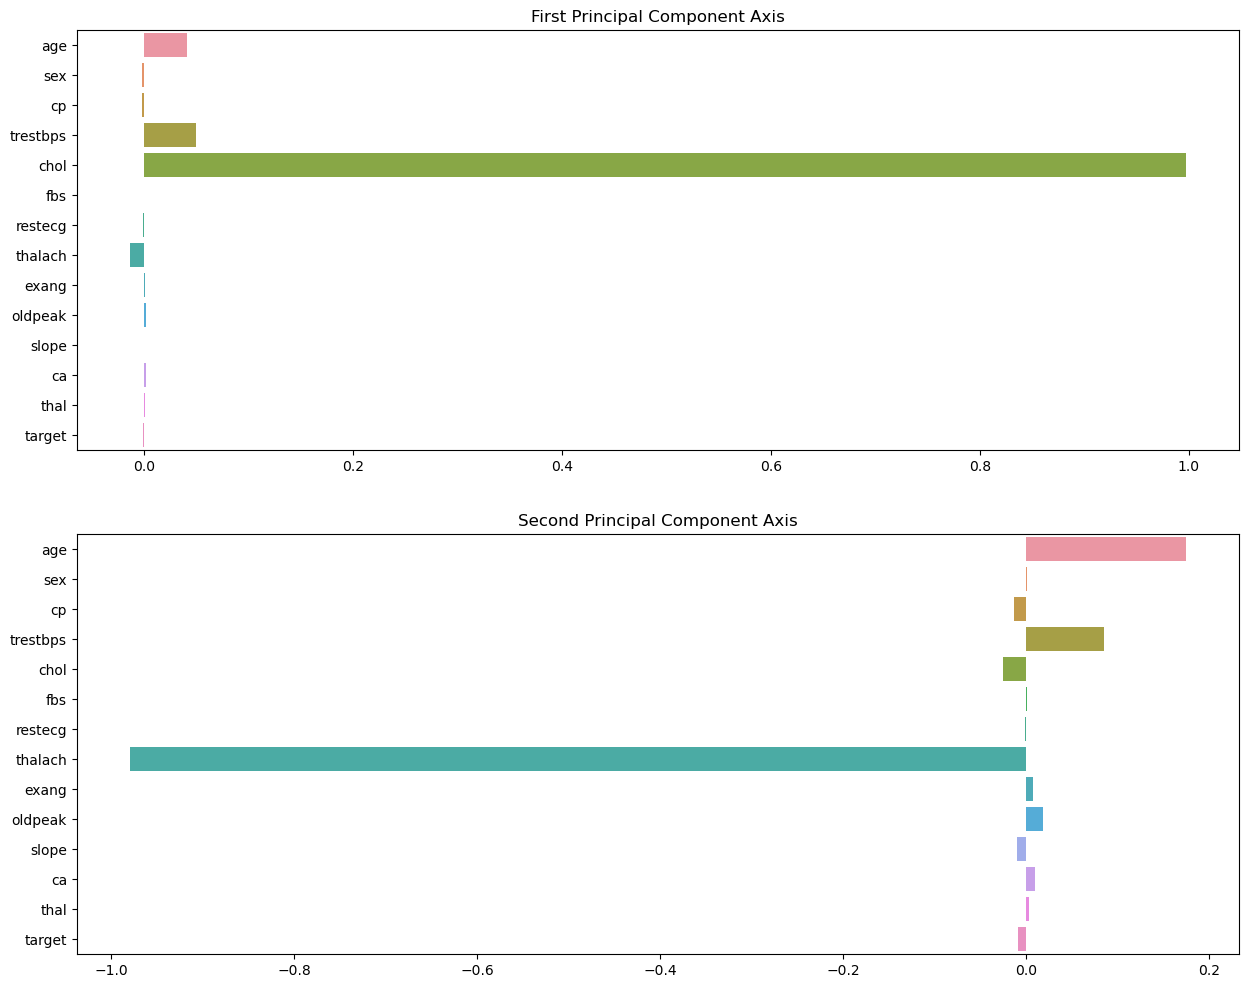

In [231]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))
sns.barplot(x=pca.components_[0], y=data.columns, orient='h', ax=ax[0])
sns.barplot(x=pca.components_[1], y=data.columns, orient='h', ax=ax[1])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')

From the First Principal Component Axis, we can see that serum cholesterol is the dominant feature, having highly positive loadings, which seems reasonable as high cholesterol is by fact one of many risk factors of heart diseases, and coincides with our visualisation finding. 

From the Second Principal Component Axis, we see that age and the resting blood pressure both have highly positive loadings, while the maximum heart rate achieved has highly negative loadings. It seems reasonable for the risk of having a heart disease to increase as age and resting blood pressure increase. However, it does not appear intuitive for the maximum heart rate to have such a negative correlation with such risk. 
Though it coincides with the previous visualisation finding that the maximum heart rate achived has a negative correlation with whether one has exercise induced angina.


However, the other features have much smaller values. Consequently, the majority of the variance is going to be dominated by these features, which is undesirable. Subsequently, we will apply normalisation on the dataset. 

## Normalisation

In [232]:
# from sklearn.preprocessing import minmax_scale
data_normalized = (data - data.min()) / (
    data.max() - data.min())

In [233]:
pca.fit(data_normalized)

PCA()

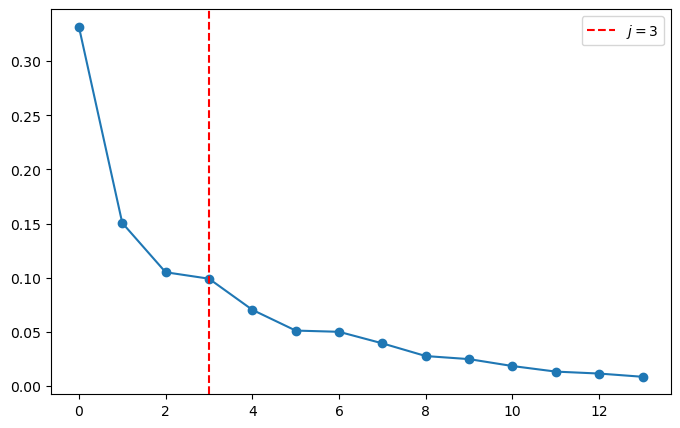

In [234]:
plt.plot(pca.explained_variance_ratio_, '-o')
plt.axvline(x=3, c='r', ls='--', label=r'$j=3$')
plt.legend()

Text(0.5, 1.0, 'Third Principal Component Axis')

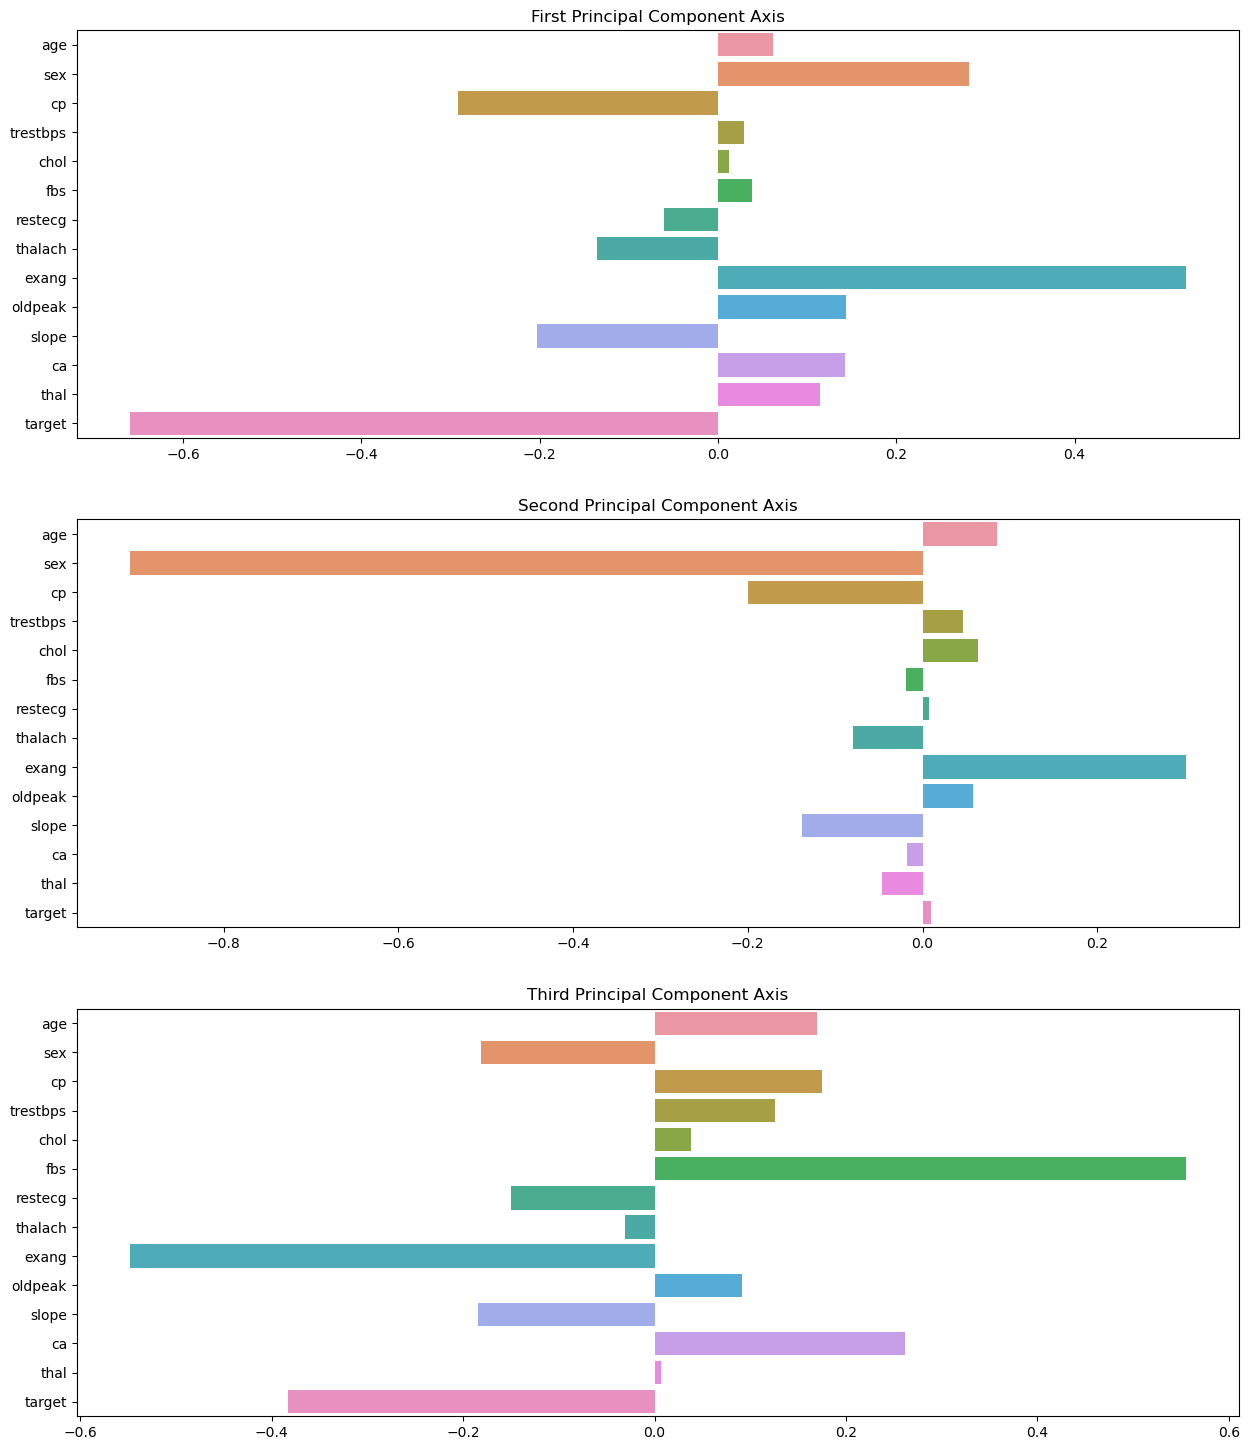

In [235]:
fig, ax = plt.subplots(3, 1, figsize=(15, 18))
sns.barplot(x=pca.components_[0], y=data.columns, orient='h', ax=ax[0])
sns.barplot(x=pca.components_[1], y=data.columns, orient='h', ax=ax[1])
sns.barplot(x=pca.components_[2], y=data.columns, orient='h', ax=ax[2])

ax[0].set_title('First Principal Component Axis')
ax[1].set_title('Second Principal Component Axis')
ax[2].set_title('Third Principal Component Axis')

Now after normalisation we can see that all variables more or less contribute to the final result of diagnosis, with some having highly positive loadings and some having highly negative loadings. 
1) From the first principal component axis, we see that for positive loadings group, major contributing variables(from most to least) exercise induced angina index, sex, number of major vessels, ST depression induced by exercise relative to rest, reversibility of defect. For negative loadings group, major contributing variables seem to be chest pain type, slope of peak exercise ST segment, the maximum heart rate achieved.
2) From the second principal component axis, we see that exercise induced angina index remains to be the feature with highest positive loadings, while sex turns out to have the most negative loadings. Serum cholesterol level still remains to be significant. 
3) From the third principal component axis, we see that fasting blood sugar has the highest positive loadings, while the number of major vessels has the second highest positive loadings. In the negative group, exercise induced angina index becomes the one with the highest loadings, while sex and slope share similar magnitudes. 

# Conclusion

Amongst three models for classification, we can see that decision tree seems to have the highest test accuracy, and is the one with the highest cross-validation score of 0.978049, while the scores for logistic regression and SVM are similar. 

In terms of dimensionality reduction, we used PCA and t-SNE. Although t-SNE limits us in giving meaningful interpretations, we could still obtain some insights of the dataset through PCA. After observing the first three principal components above, we summarise the following: 
- For the first principal component, we have roughly half positively correlated, half negatively correlated variables with the principal component. Moreover, the most influential features seem to be the exercise induced angina index, sex and chest pain type. 
- For the second principal component, we have sex being the most influential part, with exercise induced angina index being the second most. 
- For the thrid principal component, fasting blood pressure, exercise induced angina index are the most significant features contributing to the variance. 

Hence we can infer that whether a patient has exercise induced angina is likely to be a very important indicator of the likelihood of them having heart disease. Sex seems to play an important role in the diagnosis as well and seems to correlate with serum cholesterol level as well. 

However, a thorough medical assessment needs to be carried out with professional diagnosis, since results can differ based on a patient's underlying chronic diseases that could induce cardiological problems, or medication records that can also affect the development of such disease. 